# 단어간 상관도 분석
- https://drive.google.com/drive/folders/1ZHyQX8y9pa_pT2ykoV8oaql8fzo0Ar-M

## [Part1 -1 ]. DTM 제작 (직접 코드로 작성)

In [1]:
# txt = ["Hallyu to the world: the incredible rise of Korean culture",
# "From hallyu to aegyo: Korean words make mark in Oxford English Dictionary",
# "Squid Game Turned a Korean Childhood Snack Into an Overnight Hit at NYC Restaurants,"
# "All-you-can-stream buffets: The food in K-dramas is a cultural coup",
# "Squid Game: latest addition to the global Hallyu wave",
# "BTS Squid Game Kimchi why is the Hallyu wave sweeping up South America?",
# "Hallyu Culture: The Indian chapter of Korean wave",
# "South Korea’s Moment Owes More to Samsung Than Squid Game",
# "S. Korea attracts fans in Hong Kong and Russia with BTS concert-based realistic content",
# "The rise and rise of K-pop: From BTS to ‘Parasite’ to ‘Squid Game’",
# "Squid Game BTS propels Korean Wave to the next level, but will China flex its soft power muscles?"]
       

In [2]:
import pandas as pd
text = pd.read_csv('/content/koreanwave0.csv', encoding='euc-kr')

In [3]:
import nltk

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop)])

In [7]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(text.head(5))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
   publish_date                                      headline_text
0           NaN  [New, K-dramas, tune, Netflix, October, 2021, ...
1           NaN  [Korean, Film, Tourism, Festival, 2021, hold, ...
2           NaN  [3, new, K-dramas, watch, December, Telangana,...
3           NaN  [Are, K-pop, K-dramas, spur, popularity, nativ...
4           NaN  [10, Netflix, Originals, 2021, never, forget, ...


In [8]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
print(tokenized_doc[:5])

0    [K-dramas, tune, Netflix, October, 2021, Lifes...
1    [Korean, Film, Tourism, Festival, 2021, hold, ...
2        [K-dramas, watch, December, Telangana, Today]
3    [K-pop, K-dramas, spur, popularity, native, in...
4    [Netflix, Originals, 2021, never, forget, Spor...
Name: headline_text, dtype: object


In [9]:
tokenized_doc

0      [K-dramas, tune, Netflix, October, 2021, Lifes...
1      [Korean, Film, Tourism, Festival, 2021, hold, ...
2          [K-dramas, watch, December, Telangana, Today]
3      [K-pop, K-dramas, spur, popularity, native, in...
4      [Netflix, Originals, 2021, never, forget, Spor...
                             ...                        
161    [Kimchi, Chinese, name, become, epicenter, cul...
162    [Brake, Korean, corn, chicken, Boonseek, desti...
163    [South, Korea, famous, BB.Q, Chicken, finally,...
164    [Best, Korean, Dramas, KDramas, Stream, 2021, ...
165               [journey, Korean, food, Jordan, Times]
Name: headline_text, Length: 166, dtype: object

In [10]:
# 역토큰화 (토큰화 작업을 되돌림)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

text['headline_text'] = detokenized_doc # 다시 text['headline_text']에 재저장

In [11]:
txt = text['headline_text']
txt

0      K-dramas tune Netflix October 2021 Lifestyle Asia
1      Korean Film Tourism Festival 2021 hold Dhaka D...
2                K-dramas watch December Telangana Today
3      K-pop K-dramas spur popularity native ingredie...
4        Netflix Originals 2021 never forget Sportskeeda
                             ...                        
161    Kimchi Chinese name become epicenter cultural ...
162    Brake Korean corn chicken Boonseek destination...
163    South Korea famous BB.Q Chicken finally come S...
164        Best Korean Dramas KDramas Stream 2021 Parade
165                     journey Korean food Jordan Times
Name: headline_text, Length: 166, dtype: object

In [12]:
vocab = list(set(w for doc in txt for w in doc.split()))
vocab.sort()
vocab

["'CLOY",
 "'Food",
 "'Hospital",
 "'Itaewon",
 "'Matrix",
 "'Moving",
 "'Paik",
 "'Spider-Man",
 "'Vincenzo",
 '*Controversial*',
 "2'-Themed",
 '2020',
 '2021',
 '8list.ph',
 'About',
 'Absolutely',
 'Actress',
 'Adoption',
 'Advocate',
 'Affection',
 'Alan',
 'Alicia',
 'Aljazeera.com',
 'All-you-can-stream',
 'Alley',
 'Alleys',
 'Allston',
 'Along',
 'Announces',
 'Arirang',
 'Asia',
 'AsiaOne',
 'B1A4',
 'BB.Q',
 'BLACKPINK',
 'Baek',
 'Bangkok',
 'Berkeley',
 'Best',
 'Beyond',
 'Billboard',
 'Binge',
 'Binge-Watch',
 'Boar',
 'Bonchon',
 'Boonseek',
 'Brake',
 'Bread',
 'Bulletin',
 'BuzzFeed',
 'CNBC.com',
 'CNET',
 'COVID-19',
 'Canada',
 'Candy',
 'Center',
 'Cha-Cha-Cha',
 'Cheat',
 'Chicken',
 'Chili',
 'China',
 'Chinese',
 'Chronicle',
 'CitySpidey.com',
 'Class',
 'Classics',
 'Collider.com',
 'Come',
 'Coming',
 'Cond',
 'Connecting',
 'Contest',
 'Cook',
 'Cooking',
 'Cosmopolitan',
 'Could',
 'Craving',
 'Crazy',
 'Crossword',
 'Cuisine',
 'Cultural',
 'Culture',
 'D

In [13]:
def tf(t, d):
    return d.count(t)

In [14]:
result = []
N=len(txt)
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = txt[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,'CLOY,'Food,'Hospital,'Itaewon,'Matrix,'Moving,'Paik,'Spider-Man,'Vincenzo,*Controversial*,2'-Themed,2020,2021,8list.ph,About,Absolutely,Actress,Adoption,Advocate,Affection,Alan,Alicia,Aljazeera.com,All-you-can-stream,Alley,Alleys,Allston,Along,Announces,Arirang,Asia,AsiaOne,B1A4,BB.Q,BLACKPINK,Baek,Bangkok,Berkeley,Best,Beyond,...,storm,streak,street,strong,strongest,studios,study,success,survive,sway,sweet,tactics,take,task,tent,things,tick,tourism,travel,trend,trip,tune,unstoppable,unveil,upcoming,upon,vernacular,viral,watch,wave,webinar,week,weird,whole,with…,word,work,world,worldwide,young
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## [Part1 -2 ]. DTM 제작(사이킷런 제공 모듈로)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() # 일반적으로 공백을 기준으로 나눔
tdm = cv.fit_transform(txt)
tdm

<166x686 sparse matrix of type '<class 'numpy.int64'>'
	with 1467 stored elements in Compressed Sparse Row format>

In [16]:
# 단어목록 확인
feature=cv.get_feature_names()
print(feature)

print('\n-----tf Matrix------')
txtTDM=tdm.todense()
print(txtTDM)

['19', '2020', '2021', '8list', 'about', 'absolute', 'absolutely', 'acclaim', 'across', 'actors', 'actress', 'additions', 'address', 'adoption', 'adults', 'advertisement', 'advocate', 'affection', 'alan', 'alicia', 'aljazeera', 'all', 'alley', 'alleys', 'allkpop', 'allston', 'almost', 'along', 'amaze', 'announces', 'anyone', 'arirang', 'around', 'arts', 'asia', 'asiaone', 'b1a4', 'baek', 'bangkok', 'bb', 'beauty', 'become', 'behind', 'bending', 'berkeley', 'best', 'beyond', 'bibimbap', 'biggest', 'billboard', 'binge', 'blackpink', 'boar', 'bonchon', 'book', 'boonseek', 'boxscore', 'brake', 'brand', 'bread', 'brewery', 'bucket', 'buffet', 'bulletin', 'buzzfeed', 'cafes', 'call', 'can', 'canada', 'cancel', 'candy', 'catch', 'center', 'cha', 'challenge', 'change', 'chapter', 'charity', 'chat', 'cheat', 'check', 'chef', 'chefs', 'chicken', 'chili', 'china', 'chinese', 'chronicle', 'cinema', 'cities', 'cityspidey', 'class', 'classics', 'cloy', 'cnbc', 'cnet', 'collider', 'com', 'come', 'com

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
pd.DataFrame(tdm.todense(), columns=feature)

,19,2020,2021,8list,about,absolute,absolutely,acclaim,across,actors,actress,additions,address,adoption,adults,advertisement,advocate,affection,alan,alicia,aljazeera,all,alley,alleys,allkpop,allston,almost,along,amaze,announces,anyone,arirang,around,arts,asia,asiaone,b1a4,baek,bangkok,bb,...,variety,verdict,vernacular,vice,video,viewers,vincenzo,viral,visit,vogue,vulture,wall,want,watch,watched,watching,wave,webinar,week,weird,what,when,where,whole,will,with,won,word,work,world,worldwide,worth,writing,yahoo,yang,york,you,young,your,zawya
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## [Part 2 ]. 내가 직접작성하는 코드로 DTM을 제작하고 행렬화 하기

In [18]:
#########################
### DTM 제작
#########################


import pandas as pd
def tf(t, d):
    return d.count(t)



vocab = list(set(w for doc in  txt for w in doc.split()))
vocab.sort()


result = []
N=len(txt)
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = txt[i]
    for j in range(len(vocab)):
        t = vocab[j]        
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,'CLOY,'Food,'Hospital,'Itaewon,'Matrix,'Moving,'Paik,'Spider-Man,'Vincenzo,*Controversial*,2'-Themed,2020,2021,8list.ph,About,Absolutely,Actress,Adoption,Advocate,Affection,Alan,Alicia,Aljazeera.com,All-you-can-stream,Alley,Alleys,Allston,Along,Announces,Arirang,Asia,AsiaOne,B1A4,BB.Q,BLACKPINK,Baek,Bangkok,Berkeley,Best,Beyond,...,storm,streak,street,strong,strongest,studios,study,success,survive,sway,sweet,tactics,take,task,tent,things,tick,tourism,travel,trend,trip,tune,unstoppable,unveil,upcoming,upon,vernacular,viral,watch,wave,webinar,week,weird,whole,with…,word,work,world,worldwide,young
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#########################
### 행렬제작
### -----tf Matrix------
## [[0 1 0 0 1 2]
## [1 0 0 0 2 1]
## [1 0 1 1 0 0]]
#########################


# DTM 데이터 프레임을 행렬로 변환함.
# 사이킷런 CountVectorizer  패키지의 txtTDM=tdm.todense()
todense=tf_.values
print(todense.shape)
print(todense)

# 레이블 보관 사이킷런 CountVectorizer  패키지의 feature=cv.get_feature_names()
feature=tf_.columns.values
print(feature)

(166, 743)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
["'CLOY" "'Food" "'Hospital" "'Itaewon" "'Matrix" "'Moving" "'Paik"
 "'Spider-Man" "'Vincenzo" '*Controversial*' "2'-Themed" '2020' '2021'
 '8list.ph' 'About' 'Absolutely' 'Actress' 'Adoption' 'Advocate'
 'Affection' 'Alan' 'Alicia' 'Aljazeera.com' 'All-you-can-stream' 'Alley'
 'Alleys' 'Allston' 'Along' 'Announces' 'Arirang' 'Asia' 'AsiaOne' 'B1A4'
 'BB.Q' 'BLACKPINK' 'Baek' 'Bangkok' 'Berkeley' 'Best' 'Beyond'
 'Billboard' 'Binge' 'Binge-Watch' 'Boar' 'Bonchon' 'Boonseek' 'Brake'
 'Bread' 'Bulletin' 'BuzzFeed' 'CNBC.com' 'CNET' 'COVID-19' 'Canada'
 'Candy' 'Center' 'Cha-Cha-Cha' 'Cheat' 'Chicken' 'Chili' 'China'
 'Chinese' 'Chronicle' 'CitySpidey.com' 'Class' 'Classics' 'Collider.com'
 'Come' 'Coming' 'Cond' 'Connecting' 'Contest' 'Cook' 'Cooking'
 'Cosmopolitan' 'Could' 'Craving' 'Crazy' 'Crossword' 'Cuisine' 'Cultural'
 'Culture' 'Daijiworld.com' 'Daily

In [20]:
import numpy as np
# 사이킷런 CountVectorizer 에서는 todense.sum(axis=0))

print('\n-----총 TF구하기(열단위 집계)------')
countTDM=np.sum(todense,axis=0)
countTDM

## 해설
#     R  머신러닝  분석  시각화 차트  파이썬
# [[  0    1      0        0    1      2]
# [  1    0      0         0    2      1]
# [  1    0     1         1    0       0]]

#  세로단위 집계 R은 (0+1+1) 해서 2


-----총 TF구하기(열단위 집계)------


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 18,  1,  2,  1,  1,
        1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1, 14,  2,  1,  1,
        1,  1,  1,  1,  4,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  1,  2,  3,  3,  1,  7,  4,  2,  2,  2,  1,  1,  1,
        2,  1,  1,  1,  2,  1,  8,  1,  1,  1,  1,  2,  1,  2,  1,  5,  3,
        1,  1,  1,  1,  8,  1,  1,  3,  1,  2,  1,  1,  1,  2,  1,  1, 28,
       19,  1,  1,  1,  2,  1,  2,  1,  1,  2,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  1,  1,  4,  2,  2,  2,  1,  1,  1,  1,  1,  1, 23,  1,
        1,  4,  1,  1,  1,  1,  1,  3,  5, 13,  1,  2,  1,  1,  1,  2,  1,
        3,  1,  6,  1,  1,  1,  2,  1,  1,  1,  1,  3,  4,  2,  6,  1,  1,
        2,  7,  2,  1,  1,  1,  1,  1,  1,  1, 22,  1,  7,  2,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  1, 17,  9,  1,  2,  1,  1,  1, 34, 17,
        1,  8,  1,  1,  2,  2,  1,  4,  1,  1,  1,  1, 95, 76,  1,  1,  1,
        1,  1,  1,  1,  1

## [Part 3 ] 단어와 총 TF 묶어서 자료 만들기

In [21]:


#print(todense)
#print(countTDM)
#print(feature)
# 최종 결과는 어떠한 방법으로 작업해도 됨. 데이터 프레임을 행렬제작하면서 필드명하고 해서 최종결과물처럼 제작해도 됨.


print('▶ countTDM의 [[1 1 1 3 3]] 의(1,5)를 ==> [1 1 1 3 3]의 (5, ) 로 변경해야함.')
print('▶ TF의 총합인 countTDM의 shape=>')
print(np.shape(countTDM))
print(countTDM)

print('\n')
# 2차원 행렬을 1차원으로 변형, 행렬변환은 reshape도 사용되며 np.squeeze도 사용가능함.(딥러닝에서도 사용됨.)
# 또는 직접 행렬을 리스트로 옮겨도 됨.
count=np.squeeze(np.asarray(countTDM))   
print('▶ TF의 총합인 변경된 countTDM의 shape=>')
print(np.shape(count))
print(count)


## feature값과 총TF값을 이용한 리스트를 작성합니다.
word_count=list(zip(feature,count))
word_count

▶ countTDM의 [[1 1 1 3 3]] 의(1,5)를 ==> [1 1 1 3 3]의 (5, ) 로 변경해야함.
▶ TF의 총합인 countTDM의 shape=>
(743,)
[ 1  1  1  1  1  1  1  1  1  1  1  1 18  1  2  1  1  1  2  1  1  1  1  1
  2  1  1  1  1  1 14  2  1  1  1  1  1  1  4  1  1  5  1  1  1  1  1  1
  1  1  1  1  1  1  2  1  2  3  3  1  7  4  2  2  2  1  1  1  2  1  1  1
  2  1  8  1  1  1  1  2  1  2  1  5  3  1  1  1  1  8  1  1  3  1  2  1
  1  1  2  1  1 28 19  1  1  1  2  1  2  1  1  2  1  3  1  1  1  1  1  1
  3  3  1  1  4  2  2  2  1  1  1  1  1  1 23  1  1  4  1  1  1  1  1  3
  5 13  1  2  1  1  1  2  1  3  1  6  1  1  1  2  1  1  1  1  3  4  2  6
  1  1  2  7  2  1  1  1  1  1  1  1 22  1  7  2  1  1  1  2  1  1  1  1
  1  1  1 17  9  1  2  1  1  1 34 17  1  8  1  1  2  2  1  4  1  1  1  1
 95 76  1  1  1  1  1  1  1  1  1 10  2  3  2  1  1  2  1  1  1  6  2  1
  1  1  2  1  1  1  1  1  1  1  2  2  6  2  1  1  1  3  1  3  1  2  1 20
  1 17  1  3  1  1  1  1  2  2  1  1  4  1  1  2  2  1  1  1  1  1  1  4
  1  1  1  1  2  9  1  

[("'CLOY", 1),
 ("'Food", 1),
 ("'Hospital", 1),
 ("'Itaewon", 1),
 ("'Matrix", 1),
 ("'Moving", 1),
 ("'Paik", 1),
 ("'Spider-Man", 1),
 ("'Vincenzo", 1),
 ('*Controversial*', 1),
 ("2'-Themed", 1),
 ('2020', 1),
 ('2021', 18),
 ('8list.ph', 1),
 ('About', 2),
 ('Absolutely', 1),
 ('Actress', 1),
 ('Adoption', 1),
 ('Advocate', 2),
 ('Affection', 1),
 ('Alan', 1),
 ('Alicia', 1),
 ('Aljazeera.com', 1),
 ('All-you-can-stream', 1),
 ('Alley', 2),
 ('Alleys', 1),
 ('Allston', 1),
 ('Along', 1),
 ('Announces', 1),
 ('Arirang', 1),
 ('Asia', 14),
 ('AsiaOne', 2),
 ('B1A4', 1),
 ('BB.Q', 1),
 ('BLACKPINK', 1),
 ('Baek', 1),
 ('Bangkok', 1),
 ('Berkeley', 1),
 ('Best', 4),
 ('Beyond', 1),
 ('Billboard', 1),
 ('Binge', 5),
 ('Binge-Watch', 1),
 ('Boar', 1),
 ('Bonchon', 1),
 ('Boonseek', 1),
 ('Brake', 1),
 ('Bread', 1),
 ('Bulletin', 1),
 ('BuzzFeed', 1),
 ('CNBC.com', 1),
 ('CNET', 1),
 ('COVID-19', 1),
 ('Canada', 1),
 ('Candy', 2),
 ('Center', 1),
 ('Cha-Cha-Cha', 2),
 ('Cheat', 3),
 ('Ch

## [Part 4 ] 단어간 상관도 계산

In [22]:
import numpy as np
# np.corrcoef(tdm.todense(),rowvar=0)  사이킷런 패키지 사용시 가능한 명령
word_corr=np.corrcoef(todense,rowvar=False)   # rowvar옵션을 0(False)와 1(True)로 하여서 행열단위의 계산 선택가능함.
word_corr

array([[ 1.        , -0.00606061, -0.00606061, ..., -0.01056148,
        -0.00606061, -0.00606061],
       [-0.00606061,  1.        , -0.00606061, ..., -0.01056148,
        -0.00606061, -0.00606061],
       [-0.00606061, -0.00606061,  1.        , ..., -0.01056148,
        -0.00606061, -0.00606061],
       ...,
       [-0.01056148, -0.01056148, -0.01056148, ...,  1.        ,
         0.57384051, -0.01056148],
       [-0.00606061, -0.00606061, -0.00606061, ...,  0.57384051,
         1.        , -0.00606061],
       [-0.00606061, -0.00606061, -0.00606061, ..., -0.01056148,
        -0.00606061,  1.        ]])

In [23]:
display(tf_)
tf_.corr()

,'CLOY,'Food,'Hospital,'Itaewon,'Matrix,'Moving,'Paik,'Spider-Man,'Vincenzo,*Controversial*,2'-Themed,2020,2021,8list.ph,About,Absolutely,Actress,Adoption,Advocate,Affection,Alan,Alicia,Aljazeera.com,All-you-can-stream,Alley,Alleys,Allston,Along,Announces,Arirang,Asia,AsiaOne,B1A4,BB.Q,BLACKPINK,Baek,Bangkok,Berkeley,Best,Beyond,...,storm,streak,street,strong,strongest,studios,study,success,survive,sway,sweet,tactics,take,task,tent,things,tick,tourism,travel,trend,trip,tune,unstoppable,unveil,upcoming,upon,vernacular,viral,watch,wave,webinar,week,weird,whole,with…,word,work,world,worldwide,young
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
162,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
164,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,'CLOY,'Food,'Hospital,'Itaewon,'Matrix,'Moving,'Paik,'Spider-Man,'Vincenzo,*Controversial*,2'-Themed,2020,2021,8list.ph,About,Absolutely,Actress,Adoption,Advocate,Affection,Alan,Alicia,Aljazeera.com,All-you-can-stream,Alley,Alleys,Allston,Along,Announces,Arirang,Asia,AsiaOne,B1A4,BB.Q,BLACKPINK,Baek,Bangkok,Berkeley,Best,Beyond,...,storm,streak,street,strong,strongest,studios,study,success,survive,sway,sweet,tactics,take,task,tent,things,tick,tourism,travel,trend,trip,tune,unstoppable,unveil,upcoming,upon,vernacular,viral,watch,wave,webinar,week,weird,whole,with…,word,work,world,worldwide,young
'CLOY,1.000000,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.027150,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.023627,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.012233,-0.006061,...,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.010561,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.015076,-0.012233,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.008597,-0.006061,-0.010561,-0.006061,-0.006061
'Food,-0.006061,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.027150,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,1.000000,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.023627,-0.008597,-0.006061,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,-0.012233,-0.006061,...,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.010561,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.015076,-0.012233,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.008597,-0.006061,-0.010561,-0.006061,-0.006061
'Hospital,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,1.000000,-0.006061,-0.027150,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.023627,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.012233,-0.006061,...,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.010561,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.015076,-0.012233,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.008597,-0.006061,-0.010561,-0.006061,-0.006061
'Itaewon,1.000000,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.027150,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.023627,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.012233,-0.006061,...,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.010561,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.008597,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.006061,-0.015076,-0.012233,-0.006061,-0.008597,-0.008597,-0.006061,-0.006061,-0.008597,-0.006061,-0.010561,-0.006061,-0.006061
'Matrix,-0.006061,-0.006061,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,1.000000,-0.006061,-0.006061,-0.006061,-0.006061,-0.027150,-0.006061,-0.008597,-0.0

In [24]:
# import seaborn as sns
# sns.heatmap(tf_.corr(),annot=True,cmap = 'PuBu')

In [25]:
word_corr[0]   # 0번째 R값의 모든 상관도 표시

array([ 1.        , -0.00606061, -0.00606061,  1.        , -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.00606061, -0.00606061,
       -0.00606061, -0.00606061, -0.0271496 , -0.00606061, -0.00859708,
       -0.00606061, -0.00606061, -0.00606061, -0.00859708, -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.00606061, -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.00606061, -0.00606061,
       -0.02362655, -0.00859708, -0.00606061, -0.00606061, -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.01223293, -0.00606061,
       -0.00606061, -0.01371924, -0.00606061, -0.00606061, -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.00606061, -0.00606061,
       -0.00606061, -0.00606061, -0.00606061, -0.00606061, -0.00859708,
       -0.00606061, -0.00859708, -0.01056148, -0.01056148, -0.00606061,
       -0.0163346 , -0.01223293, -0.00859708, -0.00859708,  0.70496078,
       -0.00606061, -0.00606061, -0.00606061, -0.00859708, -0.00

In [26]:
### 단어의 집합별 상관계수 값 리스트화 하기

words=feature
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))

In [27]:
edges

[("'CLOY", "'Food", -0.006060606060606036),
 ("'CLOY", "'Hospital", -0.006060606060606028),
 ("'CLOY", "'Itaewon", 1.0),
 ("'CLOY", "'Matrix", -0.006060606060606024),
 ("'CLOY", "'Moving", -0.0060606060606060415),
 ("'CLOY", "'Paik", -0.006060606060606042),
 ("'CLOY", "'Spider-Man", -0.006060606060606024),
 ("'CLOY", "'Vincenzo", -0.006060606060606046),
 ("'CLOY", '*Controversial*', -0.006060606060606034),
 ("'CLOY", "2'-Themed", -0.006060606060606028),
 ("'CLOY", '2020', -0.0060606060606060224),
 ("'CLOY", '2021', -0.027149599206999966),
 ("'CLOY", '8list.ph', -0.006060606060606036),
 ("'CLOY", 'About', -0.008597082645141332),
 ("'CLOY", 'Absolutely', -0.006060606060606041),
 ("'CLOY", 'Actress', -0.006060606060606039),
 ("'CLOY", 'Adoption', -0.006060606060606026),
 ("'CLOY", 'Advocate', -0.008597082645141332),
 ("'CLOY", 'Affection', -0.006060606060606031),
 ("'CLOY", 'Alan', -0.006060606060606039),
 ("'CLOY", 'Alicia', -0.0060606060606060224),
 ("'CLOY", 'Aljazeera.com', -0.0060606

In [28]:
# 상관도 내림차순순으로 sort(reverse=True)
# 상관도 오름차순순으로 sort(reverse=False)
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges[:5] #상관도 높은 상위 5개 자료보기

[("'CLOY", "'Itaewon", 1.0),
 ("'CLOY", 'Makati', 1.0),
 ("'CLOY", 'drama-themed', 1.0),
 ("'CLOY", 'menu', 1.0),
 ("'Food", 'Alley', 1.0)]

In [29]:
edges[10:15]

[("'Hospital", "2'-Themed", 1.0),
 ("'Hospital", 'Merch', 1.0),
 ("'Hospital", 'Playlist', 1.0),
 ("'Itaewon", 'Makati', 1.0),
 ("'Itaewon", 'drama-themed', 1.0)]

## [Part 5 ] 네트워크 그래프를 이용한 단어간 상관도 시각화

In [30]:
##############################
### 상관계수 시각화에 사용할 가중치를
### 상관도로 숫자로 작업하고자 함
######################################

#weight_list=[]
#for x in edges:
    #weight_list.append(x[2])
#weight_list


weight_list=[x[2] for x in edges]   # weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [31]:
##############################
### 상관계수 시각화에 사용할 연결된 노드 이름 쌍
######################################
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[("'CLOY", "'Itaewon"),
 ("'CLOY", 'Makati'),
 ("'CLOY", 'drama-themed'),
 ("'CLOY", 'menu'),
 ("'Food", 'Alley'),
 ("'Food", 'Alleys'),
 ("'Food", 'Baek'),
 ("'Food", 'Jong-won'),
 ("'Food", 'Must-Watch'),
 ("'Food", 'allkpop'),
 ("'Hospital", "2'-Themed"),
 ("'Hospital", 'Merch'),
 ("'Hospital", 'Playlist'),
 ("'Itaewon", 'Makati'),
 ("'Itaewon", 'drama-themed'),
 ("'Itaewon", 'menu'),
 ("'Matrix", "'Spider-Man"),
 ("'Matrix", 'cinema'),
 ("'Matrix", 'gear'),
 ("'Matrix", 'release'),
 ("'Moving", 'Disney+'),
 ("'Moving", 'Hyo-joo'),
 ("'Moving", 'In-sung'),
 ("'Moving", 'original'),
 ("'Moving", 'sneak'),
 ("'Paik", 'Decider'),
 ("'Paik", 'First'),
 ("'Paik", 'Platform'),
 ("'Paik", 'Skip'),
 ("'Paik", 'Talk'),
 ("'Spider-Man", 'cinema'),
 ("'Spider-Man", 'gear'),
 ("'Spider-Man", 'release'),
 ("2'-Themed", 'Merch'),
 ("2'-Themed", 'Playlist'),
 ('2020', 'Alicia'),
 ('2020', 'Dubai'),
 ('2020', 'Expo'),
 ('2020', 'Keys'),
 ('2020', 'Meet'),
 ('2020', 'acclaim'),
 ('2020', 'critically

In [49]:
edge_list[339:358]

[('K-Food', 'despite'),
 ('K-Food', 'growth'),
 ('K-Food', 'pandemic'),
 ('K-Food', 'record'),
 ('K-Food', 'worldwide'),
 ('K-Pop', 'Lip-Smacking'),
 ('K-beauty', 'K-food'),
 ('K-beauty', 'K-toons'),
 ('K-beauty', 'Kulture'),
 ('K-craze', 'storm'),
 ('K-cuisine', 'interest'),
 ('K-food', 'K-toons'),
 ('K-food', 'Kulture'),
 ('K-toons', 'Kulture'),
 ('K-wave', 'desi'),
 ('K-wave', 'grip'),
 ('K-wave', 'millennials'),
 ('Kdramas', 'drool'),
 ('Kdramas', 'placements')]

In [82]:
edge_list.pop(349)
edge_list[339:358]

[('K-Food', 'despite'),
 ('K-Food', 'growth'),
 ('K-Food', 'pandemic'),
 ('K-Food', 'record'),
 ('K-Food', 'worldwide'),
 ('K-Pop', 'Lip-Smacking'),
 ('K-beauty', 'K-food'),
 ('K-beauty', 'K-toons'),
 ('K-beauty', 'Kulture'),
 ('K-craze', 'storm'),
 ('K-food', 'Kulture'),
 ('K-toons', 'Kulture'),
 ('K-wave', 'desi'),
 ('K-wave', 'grip'),
 ('K-wave', 'millennials'),
 ('Kdramas', 'drool'),
 ('Kdramas', 'placements'),
 ('Keys', 'Meet'),
 ('Keys', 'acclaim')]

In [90]:
edge_list[339:356]

[('K-Food', 'despite'),
 ('K-Food', 'growth'),
 ('K-Food', 'pandemic'),
 ('K-Food', 'record'),
 ('K-Food', 'worldwide'),
 ('K-Pop', 'Lip-Smacking'),
 ('K-beauty', 'K-food'),
 ('K-beauty', 'K-toons'),
 ('K-beauty', 'Kulture'),
 ('K-craze', 'storm'),
 ('K-food', 'Kulture'),
 ('K-toons', 'Kulture'),
 ('K-wave', 'desi'),
 ('K-wave', 'grip'),
 ('K-wave', 'millennials'),
 ('Kdramas', 'drool'),
 ('Kdramas', 'placements')]

In [34]:
import networkx as nx
!pip install networkx

In [84]:
G = nx.DiGraph()
# G = networkx.Graph()
rank=20

edge_set = set()  
for word1, word2, weight in edges[339:356]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('K-Food', 'despite'),
 ('K-Food', 'growth'),
 ('K-Food', 'pandemic'),
 ('K-Food', 'record'),
 ('K-Food', 'worldwide'),
 ('K-Pop', 'Lip-Smacking'),
 ('K-beauty', 'K-food'),
 ('K-beauty', 'K-toons'),
 ('K-beauty', 'Kulture'),
 ('K-craze', 'storm'),
 ('K-cuisine', 'interest'),
 ('K-food', 'K-toons'),
 ('K-food', 'Kulture'),
 ('K-toons', 'Kulture'),
 ('K-wave', 'desi'),
 ('K-wave', 'grip'),
 ('K-wave', 'millennials')}

In [85]:
# https://networkx.org/documentation/stable/tutorial.html
# https://95pbj.tistory.com/34   (한국어 사이트)


print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())

print('\n ▶노드값 출력')
print(G.nodes)

print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


## 디그리는 노드에서 분기하는 선의 갯수로서
# 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
# 그래서 분석일때는 5개의 노드(n-1)개의 디그리가 생김.  분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석-R
print('\n ▶ 디그리값 출력')  
print(G.degree)


print('\n ▶ 인접')
print(G.adj)
      
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


print('\n ▶ 요약 ')
print(nx.info(G))


 ▶ 노드갯수 출력
20

 ▶노드값 출력
['K-Food', 'despite', 'growth', 'pandemic', 'record', 'worldwide', 'K-Pop', 'Lip-Smacking', 'K-beauty', 'K-food', 'K-toons', 'Kulture', 'K-craze', 'storm', 'K-cuisine', 'interest', 'K-wave', 'desi', 'grip', 'millennials']

 ▶ 엣지(word1,word2)값 출력
[('K-Food', 'despite'), ('K-Food', 'growth'), ('K-Food', 'pandemic'), ('K-Food', 'record'), ('K-Food', 'worldwide'), ('K-Pop', 'Lip-Smacking'), ('K-beauty', 'K-food'), ('K-beauty', 'K-toons'), ('K-beauty', 'Kulture'), ('K-food', 'K-toons'), ('K-food', 'Kulture'), ('K-toons', 'Kulture'), ('K-craze', 'storm'), ('K-cuisine', 'interest'), ('K-wave', 'desi'), ('K-wave', 'grip'), ('K-wave', 'millennials')]

 ▶ 디그리값 출력
[('K-Food', 5), ('despite', 1), ('growth', 1), ('pandemic', 1), ('record', 1), ('worldwide', 1), ('K-Pop', 1), ('Lip-Smacking', 1), ('K-beauty', 3), ('K-food', 3), ('K-toons', 3), ('Kulture', 3), ('K-craze', 1), ('storm', 1), ('K-cuisine', 1), ('interest', 1), ('K-wave', 3), ('desi', 1), ('grip', 1), ('millennia

[('K-Food', 'despite', 1.0), ('K-Food', 'growth', 1.0), ('K-Food', 'pandemic', 1.0), ('K-Food', 'record', 1.0), ('K-Food', 'worldwide', 1.0), ('K-Pop', 'Lip-Smacking', 1.0), ('K-beauty', 'K-food', 1.0), ('K-beauty', 'K-toons', 1.0), ('K-beauty', 'Kulture', 1.0), ('K-craze', 'storm', 1.0), ('K-cuisine', 'interest', 1.0), ('K-food', 'K-toons', 1.0), ('K-food', 'Kulture', 1.0), ('K-toons', 'Kulture', 1.0), ('K-wave', 'desi', 1.0), ('K-wave', 'grip', 1.0), ('K-wave', 'millennials', 1.0), ('Kdramas', 'drool', 1.0), ('Kdramas', 'placements', 1.0)]


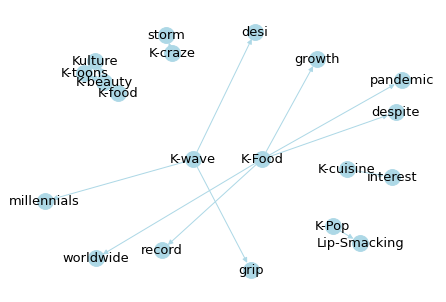

In [88]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.font_manager as fm
from matplotlib import rc
font_name = fm.FontProperties(fname="/content/NanumGothicLight.ttf").get_name()
rc('font', family=font_name)

print(edges[339:358])
nx.draw(G, with_labels = True,font_family=font_name,width=weight_list[123:127],
        node_size = 250, node_color = 'lightblue', font_size = 13, edge_color='lightblue') 

### 다른 노드

In [38]:
edge_set = set()  
for word1, word2, weight in edges[138:145]:   # 상관도가 높은 값에서 101개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('BuzzFeed', 'Unmissable'),
 ('CNBC.com', 'influence'),
 ('CNET', 'absolute'),
 ('COVID-19', 'K-Food'),
 ('COVID-19', 'ZAWYA'),
 ('COVID-19', 'despite'),
 ('COVID-19', 'growth')}

[('CNET', 'absolute', 1.0), ('COVID-19', 'K-Food', 1.0), ('COVID-19', 'ZAWYA', 1.0), ('COVID-19', 'despite', 1.0), ('COVID-19', 'growth', 1.0)]


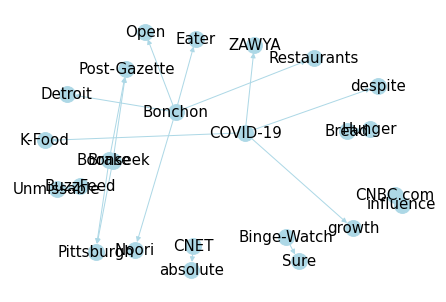

In [39]:
font_name = fm.FontProperties(fname="/content/NanumGothicLight.ttf").get_name()
rc('font', family=font_name)

print(edges[140:145])
nx.draw(G, with_labels = True,font_family=font_name,width=weight_list[140:155],
        node_size = 250, node_color = 'lightblue', font_size = 15, edge_color='lightblue') 